# Introduction to Data Visualization with Seaborn

Seaborn es una poderosa biblioteca de Python que facilita la creación de visualizaciones informativas y atractivas. Este curso proporciona una introducción a Seaborn y le enseña cómo visualizar sus datos utilizando diagramas como diagramas de dispersión, diagramas de caja y diagramas de barras. Hará esto mientras explora las respuestas de la encuesta sobre los pasatiempos de los estudiantes y los factores que están asociados con el éxito académico. También aprenderá sobre algunas de las ventajas de Seaborn como herramienta de visualización estadística, como por ejemplo, cómo calcula automáticamente los intervalos de confianza. Al final del curso, podrá utilizar Seaborn en una variedad de situaciones para explorar sus datos y comunicar eficazmente los resultados de sus análisis de datos a otros.

###  PANDAS + MATPLOTLIB == "SEABORN"

In [77]:
# Librerias
import pandas as pd
import numpy as np


In [124]:
# CARGANDO DATOS
mpg = pd.read_csv("../datasets/mpg.csv")
survey_data = pd.read_csv("../datasets/young-people-survey-responses.csv",index_col=0)

## 1. Introduction to Seaborn

### Introduction to Seaborn

Grafico de un flujo de trabajo de analisis de datos tipicos
<img src="https://i.ibb.co/CHsLNms/Screenshot-25.png" alt="Screenshot-25" border="0">

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
height = [62, 64, 69, 75, 66, 68, 65, 71, 76, 73]
weight = [120, 136, 148, 175, 137,165, 154, 172, 200, 187]
sns.scatterplot(x=height, y=weight) #DIAGRAMA DE DISPERSION
plt.show()

In [ ]:
gender = ["Female", "Female", "Female", "Female", 
          "Male", "Male", "Male", "Male", "Male", "Male"]
sns.countplot(x=gender) # CONTEO POR CATEGORIA
plt.show()

### Using pandas with Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("masculinity.csv")
sns.countplot(x="how_masculine",
              data=df)
plt.show()

### Adding a third variable with hue

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


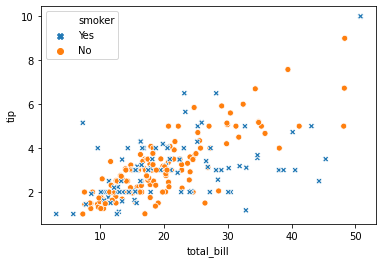

In [22]:
sns.scatterplot(x="total_bill",y="tip",
                data=tips, 
                hue="smoker", hue_order=["Yes","No"],
                style="smoker")
plt.show()

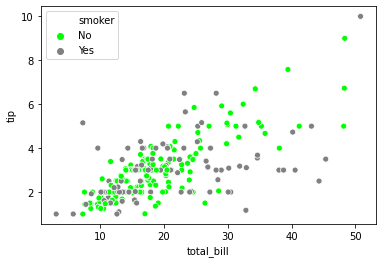

In [8]:
hue_colors = {"Yes": "#808080", 
              "No": "#00FF00"}

sns.scatterplot(x="total_bill",y="tip",
                data=tips, hue="smoker",
                palette=hue_colors)
plt.show()

COLORES
<img src="https://i.ibb.co/GM6txxx/Screenshot-26.png" alt="Screenshot-26" border="0">

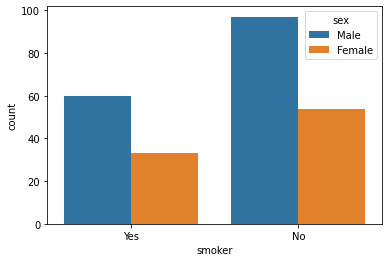

In [9]:
sns.countplot(x="smoker",hue="sex", data= tips)
plt.show()

## 2. Visualizing Two Quantitative Variables

### Introduction to relational plots and subplots

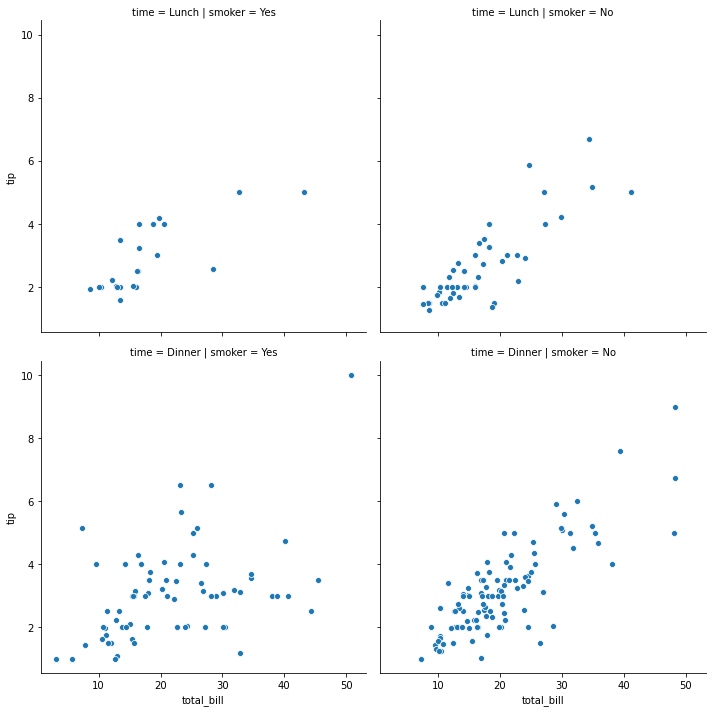

In [17]:
# relplot() --> Trama relacional; crear subtramas en una sola figura

sns.relplot(x="total_bill",y="tip",
                data=tips,
                kind="scatter",
                row="time",
                col="smoker") # col o row
plt.show()

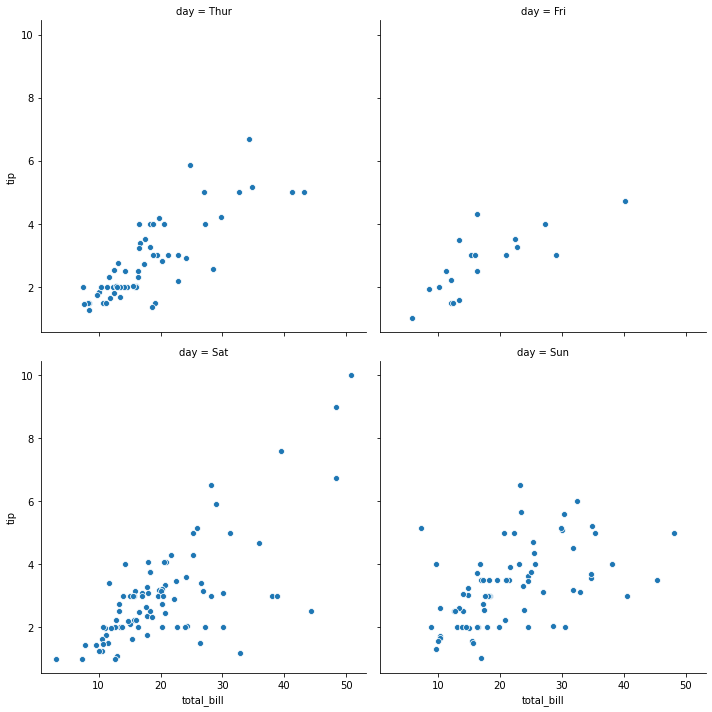

In [18]:
sns.relplot(x="total_bill",y="tip",
                data=tips,
                kind="scatter",
                col="day",
                col_wrap=2,
                col_order=["Thur","Fri",
                           "Sat","Sun"]) # col_wrap --> cuantas columnas
plt.show()

### Customizing scatter plots

In [27]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


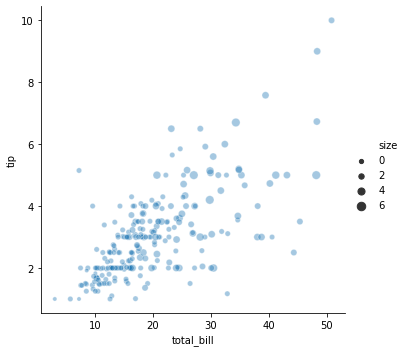

In [26]:
sns.relplot(x="total_bill",y="tip",
                data=tips, kind="scatter",
                size="size",
                alpha=0.4)
plt.show()

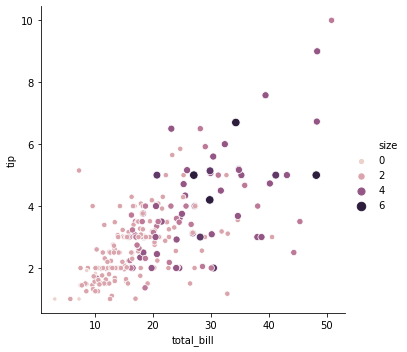

In [20]:
sns.relplot(x="total_bill",y="tip",
                data=tips, kind="scatter",
                size="size",
                hue="size") # Agregar matiz de color
plt.show()

### Introduction to line plots

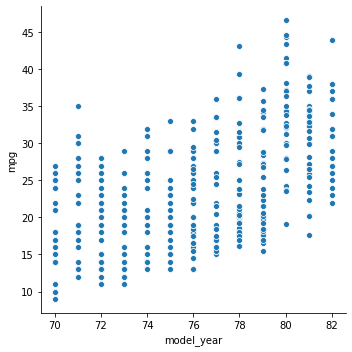

In [38]:
# MULTIPLE OBSERVACIONES
sns.relplot(x="model_year", y="mpg", data=mpg, kind="scatter")
plt.show()

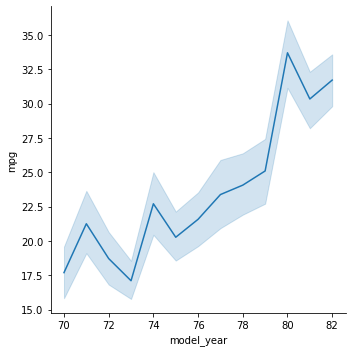

In [39]:
# MULTIPLE OBSERVACIONES
# lineas ( media linea y sombreado los valores )
# INTERVALO DE CONFIANZADEL 95%
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line")
plt.show()

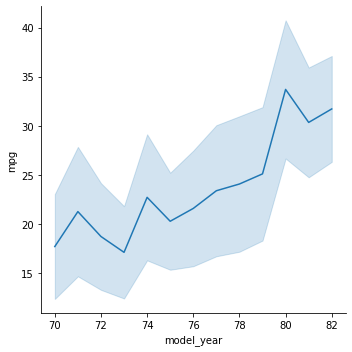

In [41]:
# MULTIPLE OBSERVACIONES
# PARA VER QUE TAN VARIADO -- DISTRIBUCION DE LOS DATOS
# DESVIACION ESTANDAR 
sns.relplot(x="model_year", y="mpg", data=mpg, kind="line",
            ci="sd") #ci=None
plt.show()

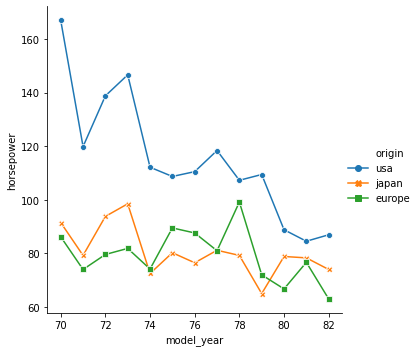

In [42]:
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, 
            kind="line", 
            ci=None, 
            style="origin", 
            hue="origin",
            markers=True,
            dashes=False) # dashes: lineas continuas NO != estilos
plt.show()

## 3. Visualizing a Categorical and a Quantitative Variable

### Count plots and bar plots

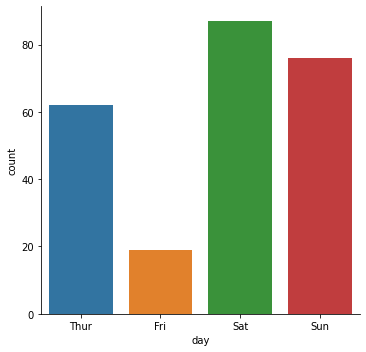

In [51]:
category_order = ["Sun", "Saturday","Fri", "Thur"]
sns.catplot(x="day",            
            data=tips,            
            kind="count",
            order=category_order)
plt.show()

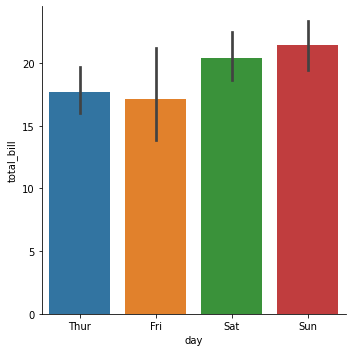

In [46]:
# "total_bill" -  variable cuantitativa - Promedio
sns.catplot(x="day", y="total_bill",         
            data=tips,            
            kind="bar") # ci= None sin intervalos de confianza
plt.show()

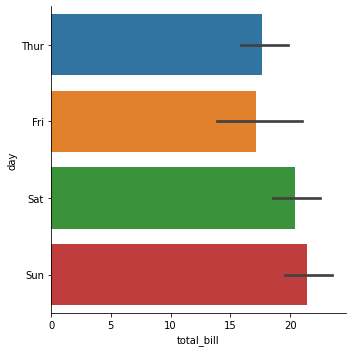

In [47]:
sns.catplot(y="day", x="total_bill",         
            data=tips,            
            kind="bar") # ci= None sin intervalos de confianza

plt.show()

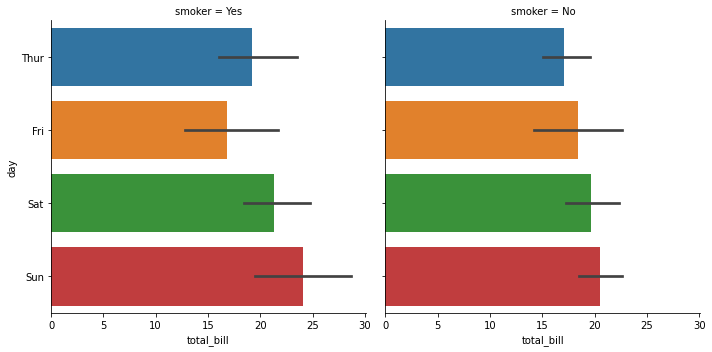

In [53]:
sns.catplot(y="day", x="total_bill",         
            data=tips,            
            kind="bar",
            col="smoker" ) # ci= None sin intervalos de confianza

plt.show()

### Box plots

In [ ]:
# CUADRO REPRESENTAN DEL 25 AL 75 % DE LOS DATOS
# LINEA DEL MEDIO REPRESENTA LA MEDIANA

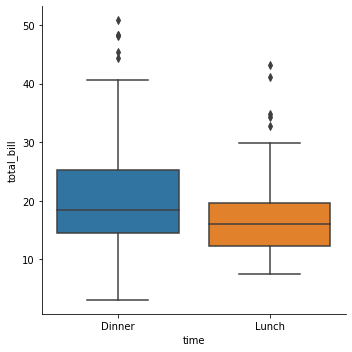

In [60]:
# Medida del bigote es 2.5*RI (Rango intercuartilico)
# DATOS
# sym="" =>  # OMITIR LOS VALORES ATIPICOS
# whis=2.0 => Modificar el tamano del bigote
# whis=[5, 95] # Percentil 5 y 95
# whis=[0, 100] #valor maximo y minimo
sns.catplot(x="time", y="total_bill",            
            data=tips,            
            kind="box",
           order=["Dinner","Lunch"])
plt.show()

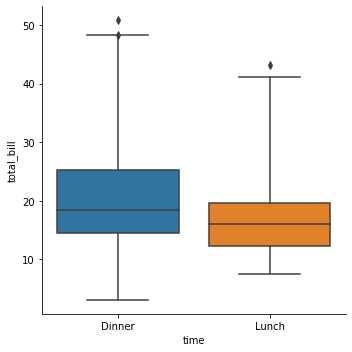

In [64]:
sns.catplot(x="time", y="total_bill",            
            data=tips,            
            kind="box",
           order=["Dinner","Lunch"],
           whis=[0, 99])
plt.show()

### Point plots

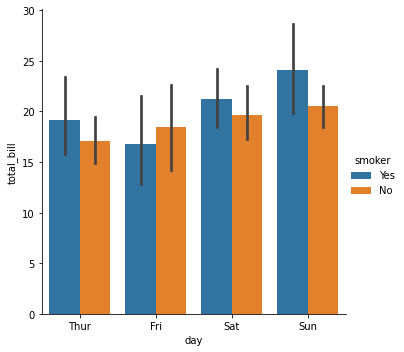

In [68]:
sns.catplot(x="day", y="total_bill",         
            data=tips, hue="smoker",          
            kind="bar")
plt.show()

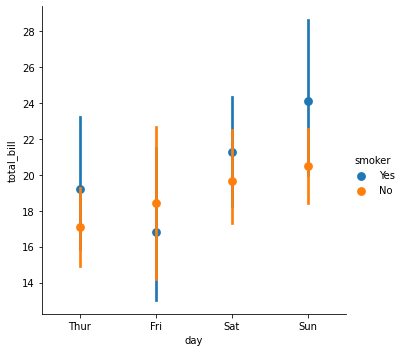

In [75]:
sns.catplot(x="day",             
            y="total_bill",             
            data=tips,            
            hue="smoker",            
            kind="point",
            join=False) # Para no tener conexion lineal entre los puntos))
plt.show()

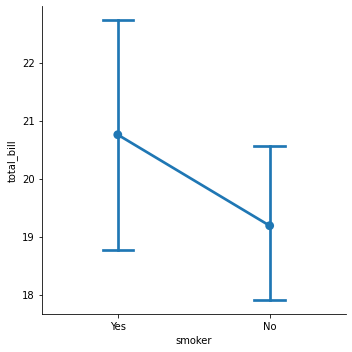

In [83]:
# capsize => Agregar limites
from numpy import median
sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,             
            kind="point",
            capsize=0.2,
            estimador=median)   # Se cambia de media a mediana         
plt.show()

## 4. Customizing Seaborn Plots

### Changing plot style and color

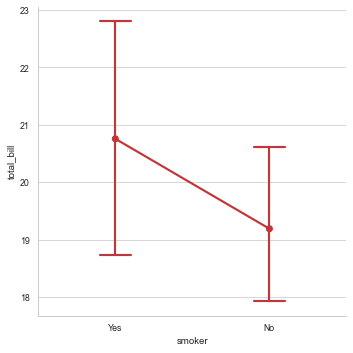

In [98]:
# sns.set_style => "white","dark","whitegrid","darkgrid","ticks"
# whitegrid muy interesante
sns.set_style("whitegrid")
sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,             
            kind="point",
            capsize=0.2,
            estimador=median)   # Se cambia de media a mediana         
plt.show()

<img src="https://i.ibb.co/Kq0ChmD/Screenshot-30.png" alt="Screenshot-30" border="0">

In [ ]:
# AÑADIR PALETAS
# sns.set_palette("RdBu")

custom_palette = ["red", "green", "orange", "blue","yellow", "purple"]
# sns.set_palette(custom_palette)

custom_palette = ['#FBB4AE', '#B3CDE3', '#CCEBC5', '#DECBE4', 
                  '#FED9A6', '#FFFFCC', '#E5D8BD', '#FDDAEC', '#F2F2F2']
# sns.set_palette(custom_palette)


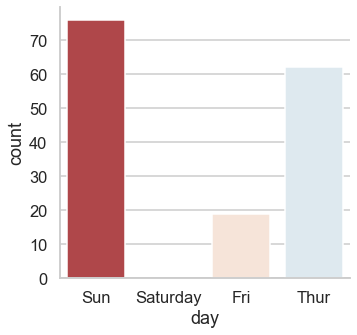

In [102]:
sns.set_palette("RdBu")
category_order = ["Sun", "Saturday","Fri", "Thur"]
sns.catplot(x="day",            
            data=tips,            
            kind="count",
            order=category_order)
plt.show()

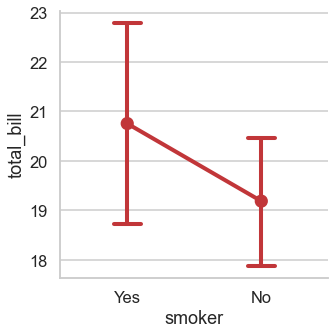

In [99]:
# sns.set_context(=> "paper","notebook","talk","poster"
# talk,poster EXCELENTE

sns.set_context("talk")
sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,             
            kind="point",
            capsize=0.2,
            estimador=median)   # Se cambia de media a mediana         
plt.show()

### Adding titles and labels: Part 1

<img src="https://i.ibb.co/1XKQ02b/Screenshot-31.png" alt="Screenshot-31" border="0"></a>

<class 'seaborn.axisgrid.FacetGrid'>


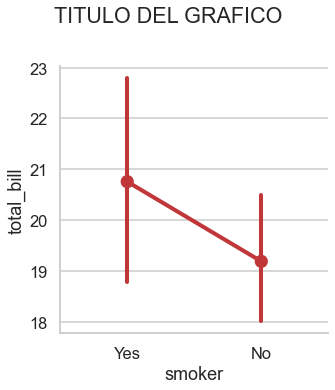

In [106]:
g=sns.catplot(x="smoker",             
            y="total_bill",             
            data=tips,             
            kind="point") 
g.fig.suptitle("TITULO DEL GRAFICO",y=1.1) # y=1.2 alejar el titulo

print(type(g))
plt.show()

### Adding titles and labels: Part 2

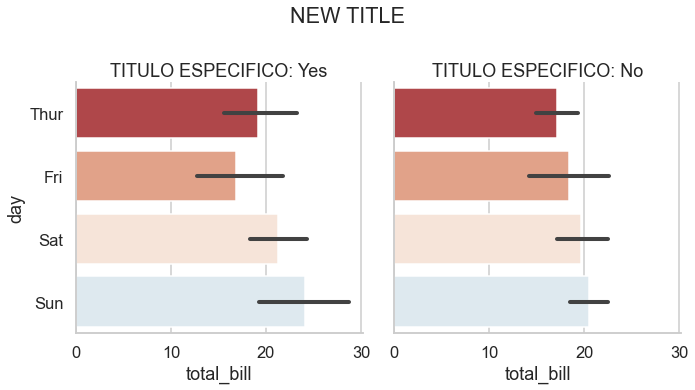

In [120]:
g= sns.catplot(y="day", x="total_bill",         
            data=tips,            
            kind="bar",
            col="smoker" ) # ci= None sin intervalos de confianza
g.fig.suptitle("NEW TITLE", y=1.1)
g.set_titles("TITULO ESPECIFICO: {col_name}")
plt.show()

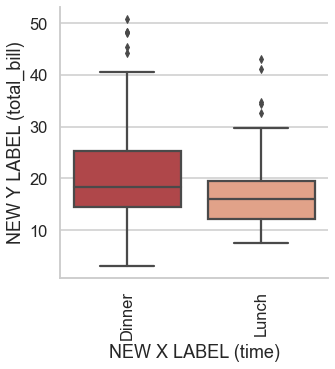

In [119]:
g=sns.catplot(x="time", y="total_bill",            
            data=tips,            
            kind="box",
           order=["Dinner","Lunch"])
g.set(xlabel="NEW X LABEL (time)",
      ylabel="NEW Y LABEL (total_bill)")
plt.xticks(rotation=90)
plt.show()

### Putting it all together

In [ ]:
# hue => CREACIOON DE SUBGRUPOS != COLORES
# row,col => CREAR SUBGRUPOS - SUBTRAMAS

In [127]:
survey_data.head(3)

,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,Internet usage,Finances,Age,Siblings,Gender,Village - town
0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,few hours a day,3.0,20.0,1.0,female,village
1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,few hours a day,3.0,19.0,2.0,female,city
2,5.0,1.0,5.0,1.0,5.0,5.0,1.0,5.0,3.0,few hours a day,2.0,20.0,2.0,female,city


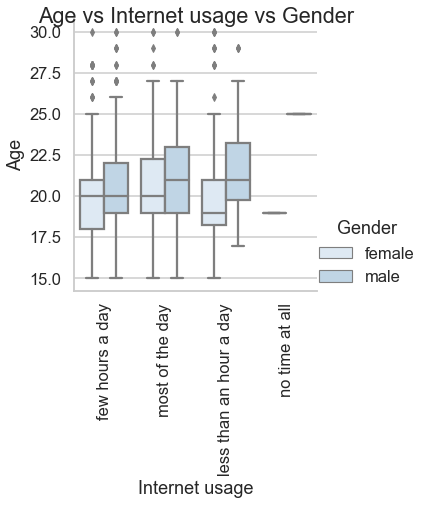

In [132]:
sns.set_palette("Blues")

g = sns.catplot(x="Internet usage",
                y="Age", data=survey_data, 
                kind="box", hue="Gender")

g.fig.suptitle("Age vs Internet usage vs Gender")
plt.xticks(rotation=90)
plt.show()

### Well done! What's next?